In [1]:
%load_ext watermark
%watermark -a 'eli knaap'
%load_ext autoreload
%autoreload 2

from libpysal import examples
from esda import correlogram

import geopandas as gpd

Author: eli knaap



In [2]:
sac = gpd.read_file(examples.load_example("Sacramento1").get_path("sacramentot2.shp"))

In [3]:
sac = sac.to_crs(sac.estimate_utm_crs())  # now in meters)

In [4]:
correlogram?

Signature:
correlogram(
    geometry: geopandas.geoseries.GeoSeries,
    variable: str | list | pandas.core.series.Series | None,
    support: list | None = None,
    statistic: collections.abc.Callable | str = <class 'esda.moran.Moran'>,
    distance_type: str = 'band',
    weights_kwargs: dict = None,
    stat_kwargs: dict = None,
    select_numeric: bool = False,
    n_jobs: int = -1,
    n_bins: int | None = 50,
) -> pandas.core.frame.DataFrame
Docstring:
Generate a spatial correlogram

A spatial profile is a set of spatial autocorrelation statistics calculated for
a set of increasing distances. It is a useful exploratory tool for examining
how the relationship between spatial units changes over different notions of scale.

Parameters
----------
geometry : gpd.GeoSeries
    geodataframe holding spatial and attribute data
variable: pd.Series or list
    pandas series matching input geometries
support : list or None
    list of values at which to compute the autocorrelation statistic

In [5]:
from esda import Moran, Geary, G

## Distance Bands

In [6]:
# Create a liste of distances between 500 and 5000 (meters, here) in increments of 500

distances = [i+500 for i in range(0,5000, 500)]

In [7]:
distances

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

The correlogram will compute an autocorrelation statistic (Moran's $I$ by default) at each distance threshold. Plotting this statistic against distance reveals how spatial similarity changes over distance (similar in concept to a variogram)

In [ ]:
prof = correlogram(
    sac.centroid,
    sac.HH_INC,
    distances,
    Moran
)

`prof` is a dataframe of autocorrelation statistics indexed by distance. It includes all attributes created by the esda autocorrelation statistic class (e.g. [Moran](https://pysal.org/esda/generated/esda.Moran.html#esda.Moran), [Geary](https://pysal.org/esda/generated/esda.Geary.html#esda.Geary), or [Geits-Ord G](https://pysal.org/esda/generated/esda.G.html#esda.G)). The row index for each statistic is the distance at which it was computed

In [9]:
prof.head()

,y,w,permutations,n,z,z2ss,EI,VI_norm,seI_norm,VI_rand,...,z_rand,p_norm,p_rand,sim,p_sim,EI_sim,seI_sim,VI_sim,z_sim,p_z_sim
500,"[52941, 51958, 32992, 54556, 50815, 60167, 490...",<libpysal.weights.distance.DistanceBand object...,999,403,"[0.27506115837390277, 0.21948138443207246, -0....",1.260604e+11,-0.002488,0.497534,0.705361,0.496239,...,0.086188,9.314058e-01,9.313166e-01,"[-0.041149125017795225, 0.8047828919464444, 0....",0.465,-0.017506,0.693436,0.480854,0.109214,4.565164e-01
1000,"[52941, 51958, 32992, 54556, 50815, 60167, 490...",<libpysal.weights.distance.DistanceBand object...,999,403,"[0.27506115837390277, 0.21948138443207246, -0....",1.260604e+11,-0.002488,0.014259,0.119409,0.014221,...,4.147088,3.447621e-05,3.367309e-05,"[0.01407910066509541, -0.09399265148441757, -0...",0.001,-0.007273,0.120349,0.014484,4.149132,1.668694e-05
1500,"[52941, 51958, 32992, 54556, 50815, 60167, 490...",<libpysal.weights.distance.DistanceBand object...,999,403,"[0.27506115837390277, 0.21948138443207246, -0....",1.260604e+11,-0.002488,0.004586,0.067719,0.004574,...,6.763620,1.430242e-11,1.345857e-11,"[-0.028776580865062164, 0.07946937157388524, 0...",0.001,-0.003352,0.067581,0.004567,6.781418,5.950106e-12
2000,"[52941, 51958, 32992, 54556, 50815, 60167, 490...",<libpysal.weights.distance.DistanceBand object...,999,403,"[0.27506115837390277, 0.21948138443207246, -0....",1.260604e+11,-0.002488,0.002164,0.046515,0.002158,...,12.164298,5.846476e-34,4.815656e-34,"[-0.0566559868640034, 0.06456200403436937, -0....",0.001,-0.000508,0.047756,0.002281,11.791263,2.164994e-32
2500,"[52941, 51958, 32992, 54556, 50815, 60167, 490...",<libpysal.weights.distance.DistanceBand object...,999,403,"[0.27506115837390277, 0.21948138443207246, -0....",1.260604e+11,-0.002488,0.001481,0.038483,0.001477,...,13.102771,3.974924e-39,3.174519e-39,"[-0.03272028047068946, -0.025327634962963246, ...",0.001,-0.002785,0.039315,0.001546,12.816543,6.623787e-38


Often, it is easiest to visualize the statistic, and the pandas `plot` function will plot a column against the dataframe's index by default

<Axes: >

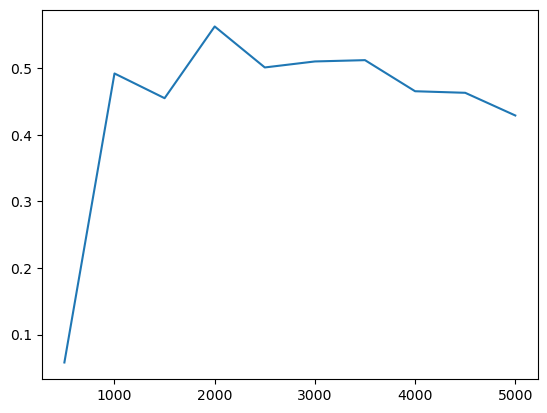

In [ ]:
ax = prof.I.plot()
ax.set_xlabel("distance (m)")
ax.set_ylabel("Moran's I")

Autocorrelation statistics differ in concept, so the shape of the spatial correlogram statistic will vary considerably, based on which statistic is created. For example, we can also plot Geary's $C$

In [ ]:
prof = correlogram(
    sac.centroid,
    sac.HH_INC,
    distances,
    statistic=Geary
)

<Axes: >

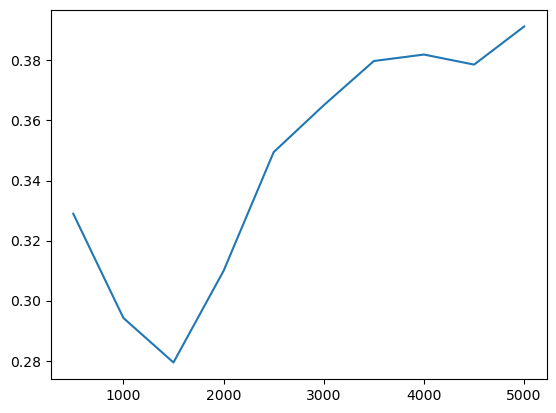

In [ ]:
ax = prof.C.plot()
ax.set_xlabel("distance (m)")
ax.set_ylabel("Geary's C")

...Or Getis-Ord $G$

In [ ]:
prof = correlogram(
    sac.centroid,
    sac.HH_INC,
    distances,
    statistic=G
)

<Axes: >

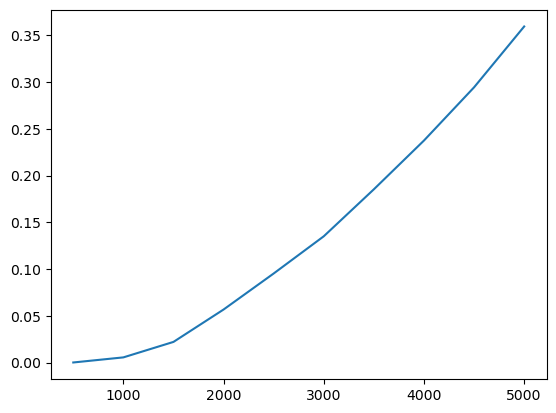

In [ ]:
ax = prof.G.plot()
ax.set_xlabel("distance (m)")
ax.set_ylabel("Getis-Ord G")

You can also leave the distance thresholds unspecified, and the correlogram will estimate over a reasonable range of distances:

<Axes: >

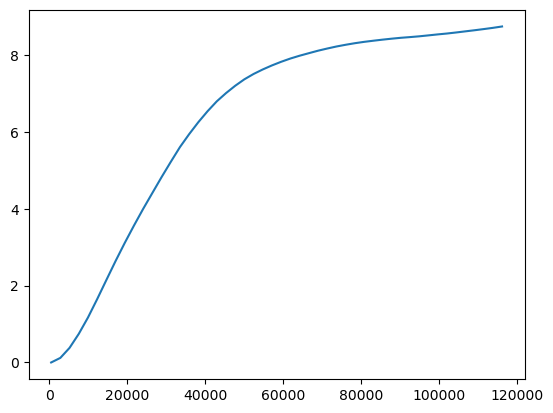

In [ ]:
prof = correlogram(
    sac.centroid,
    sac.HH_INC,
    statistic=G
)
ax = prof.G.plot()
ax.set_xlabel("distance (m)")
ax.set_ylabel("Getis-Ord G")

## KNN Distance

It is also possible to consider different concepts of *distance*. For example, rather than stepping through increments of Euclidean distance/length at each interval, we could instead step through increments of nearest-neighbors.

Instead of adding neighbors using sequential distances of 500 meters, here we will step through the 50 nearest neighbors, adding one neighbor at a time

In [16]:
kdists = list(range(1,50))

In [20]:
kcorr = correlogram(sac.centroid, sac.HH_INC, kdists, distance_type='knn')

<Axes: >

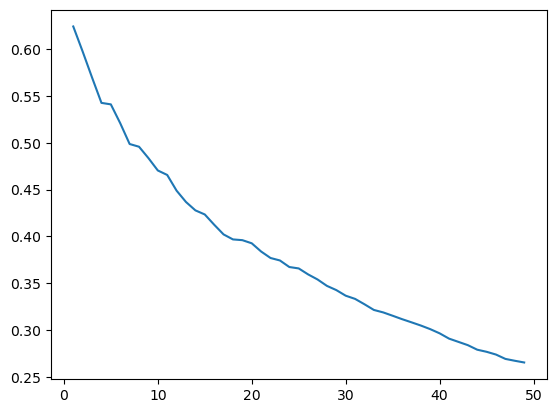

In [ ]:
ax = kcorr.I.plot()
ax.set_xlabel("number of nearest neighbors")
ax.set_ylabel("Moran's I")

# Nonparametric

Finally it is also possible to fit a non-parametric curve to estimate spatial autocorrelation as a function of distance. This is done using a LOWESS smoother, which fits a locally-weighted polynomial regression to the data based on the following regression: 

$$ z_iz_j = f(d_{ij}) + u_{ij}$$

where $z_i$ and $z_j$ are standardized values of the variable of interest at locations $i$ and $j$, $d_{ij}$ is the distance between locations $i$ and $j$, and $u_{ij}$ is an error term. The function $f$ is estimated using a LOWESS smoother, which fits a locally-weighted polynomial regression to the data.

This can be interpreted as the correlation between observations separated by *approximately* the distance on the horizontal axis.

Text(0, 0.5, 'Correlation between pairs\napproximately this separation')

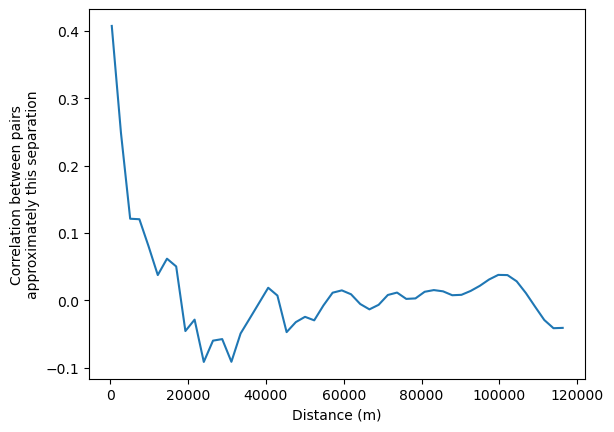

In [26]:
nonparametric = correlogram(sac.centroid, sac.HH_INC, statistic='lowess')
ax = nonparametric.lowess.plot()
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Correlation between pairs\napproximately this separation")